 # TP6: Apprentissage profond(Deep learning)
 ## TP6.1 Le Perceptron : Régression linéaire  
 Dans ce TP, nous explorerons le fonctionnement interne des neurones/unités et des couches.
L'objecif est double, tout d'abord se familiariser avec les bibliothèques (librairies) tensorflow et keras, puis comparer différentes architectures de réseaux de nruones.


## Librairies (Bibliothèques)
**Tensorflow et Keras**  
Tensorflow est un logiciel d'apprentissage automatique développé par Google. En 2019, Google a intégré Keras dans Tensorflow et a publié Tensorflow 2.0. Keras est un framework développé indépendamment par François Chollet qui crée une interface simple et centrée sur les couches de Tensorflow. Ce cours utilisera l'interface Keras. 


#### Travail demandé :
Objectif  comparer les performances 
- d'un réseau de neurones simple (un Perceptrion, 1 seul neurone de sortie) (TP6.1)
- et un réseau plus dense avec une couche cachée et une couche de sortie composée d'un seul neurone (TP6.2). 

On travaille sur le Dataset houses,  4 variables et 100 exemples.
<span style="color:green">  L'architecture du réseau à un réel impact sur les résultats </span>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


In [38]:
#fonction utile pour calculer le R2 score
from keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Neurone sans activation - Régression linéaire

### 1. Sélection des données 
On utilisera les données houses.
On comence tout d'abord par le petit  (Samll) Dataset puis on regait le process en prenant le Large dataset.

#### Small dataset

In [39]:
# lecture du fichier texte.
data=pd.read_csv("../../data/houses.txt", header=None)
data = data.rename(columns={0: 'Surf', 1: 'Nbpieces', 2: 'nbEtage', 3: 'Age', 4:'Prix'})
X= data.drop('Prix',  axis=1)
y=data['Prix']
data.head(3)


,Surf,Nbpieces,nbEtage,Age,Prix
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8


## 2 Préparation des données

#### Split des données 

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 2.1  Normalisation des données
Rappel : Il est primordial de normaliser les données. Vous pourrez vérifier les performances de vos modèles avec et sans données normalisées
- Deux options : on utilise soit, notre propre normalisation ou une normalisation proposée dans sklearn.

#### Option 1

In [41]:
## On peut utiliser une simple normalisation (X - moyenne)/ecart type)
# C'est une standardisation la même que StandardScaler de scikit learn
 
mean = X_train.mean()
std  = X_train.std()
X_train = (X_train - mean) / std

# Normalisation des données de test
X_test  = (X_test  - mean) / std

X_train.head(3)

,Surf,Nbpieces,nbEtage,Age
11,-0.516450,-1.044218,1.374513,-0.827154
47,0.571521,0.417687,-0.717137,-0.867757
85,0.406756,0.417687,1.374513,-0.867757


#### Option 2:
Une autre façon de normaliser ( utilisation d'un encoder fourni par sklearn)

In [42]:
### Option 2 :  Attention Une seule normalisation
encoder=RobustScaler()
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


### 3. Construction (définition) du modèle 
On construite un modèle de régression linéaire. La fonction mise en œuvre par un neurone sans activation est la même que la régression linéaire du chapire 2.:
<figure>
    <img src="../images/perceptron.png"  style="width:440px;height:200px;" >
</figure>

$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

La définition d'un modèle exige le choix d'un certains nombre d'options (paramètres):  
1- Une architecture :
- combien de couches; combien de neurones par couche; quelles fonctions d'activation par couche

2- Des paramètres relatifs au modèle (compile)
- optimize, la loss, les metrics, ...

3- Des paramètres relatifs à la phase d'entrainement  (fit)
- les données d'entrainement, le nombre d'époques, la taille du lot (batch), les données de test

Vous trouverez dans ce qui suit les liens vous permettant de choisir les diférentes options (paramètres) du modèle. 
- [Optimizer:](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers ) C'est l'algorithme d'apprentissage utilisé pour trouver les bons paramètres
- [Activation:](https://www.tensorflow.org/api_docs/python/tf/keras/activations): `sigmoid`, `linear`, `relu`, ...
- [Loss :](https://www.tensorflow.org/api_docs/python/tf/keras/losses) fonctions d'erreurs, `mse`, `BinaryCrossentropy`, `CategoricalCrossentropy`, ...
- [Metrics :](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) `Accuracy`, `F1Score`,`mae`, `mse`...

3



### 3.1 Un réseau de neurone à 1 neurone. 

Ecire le modèle de réseau 1 neurone (une simple régression linéaire)

In [43]:
# Défintion du modèle 
m = X_train.shape[1]
model = tf.keras.Sequential ([
    tf.keras.layers.Input(m, name="InputLayer"),
    tf.keras.layers.Dense(units=1, activation = 'linear',name='output')
])
    

In [44]:
#Compilation du modèle pour la phase d'apprentissage
model.compile(optimizer='adam',
              loss= 'mse',
               metrics=['mae',r2_score])


### Questions ;
- Combien de paramètres possède ce modèle. Justifier votre réponse, indiquer à quoi ils correspodent exactement ?

In [45]:
# Affichage de l'architecture du modèle 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### On peut visualiser les paramètres du réseau

In [46]:
W1, b1 = model.get_layer("output").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)


W1(4, 1):
 [[-0.44479162]
 [-0.344936  ]
 [ 0.23426592]
 [ 0.43667877]] 
b1(1,): [0.]


### 4. Entrainement du modèle (Model training)

In [47]:
# Entrainement du modele
history  = model.fit(X_train, 
                     y_train, 
                     epochs=100, 
                     batch_size= 10, 
                     verbose=False,
                     validation_data = (X_test, y_test))
#model.metrics_names

#### Visualiser les patramètres appris

In [48]:
model.get_weights()

[array([[ 0.02006974],
        [-0.8409447 ],
        [ 0.8830528 ],
        [ 1.0219662 ]], dtype=float32),
 array([0.69729435], dtype=float32)]

### 5. Evaluation des performances du modèle 
Les scores (métrqiues) de performances sont définis dans le paramètres `metrics` du modèle. 


In [49]:
score = model.evaluate(X_test, y_test, verbose=0)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))
#print('x_test / r2_score  : {:5.4f}'.format(score[3]))


x_test / loss      : 144884.9375
x_test / mae       : 362.1935
x_test / mse       : -9.6542


### Historique du training (training history)
On peut afficher l'historique de l'apprentissge. 
`history` est un dictionnaire, on peut afficher ses paramètres mais surtout tous les scores de performanes  du modèle sur le traning et le validation data.  `history.history.keys()` renvoie les clés des données sauvegardées. 

In [50]:
print(history.params)
print(history.history.keys())
#print(history.history['loss'])

{'verbose': False, 'epochs': 100, 'steps': 7}
dict_keys(['loss', 'mae', 'r2_score', 'val_loss', 'val_mae', 'val_r2_score'])


#### On peut afficher tout l'historique des calculs de cout

In [51]:
import pandas as pd 
df=pd.DataFrame(data=history.history)
df.head(5)

,loss,mae,r2_score,val_loss,val_mae,val_r2_score
0,140158.109375,361.148773,-17.113470,145978.203125,363.667053,-9.928077
1,140148.406250,361.135590,-17.365126,145967.171875,363.652008,-9.927260
2,140139.078125,361.122559,-18.623964,145955.828125,363.636993,-9.926423
3,140129.687500,361.109589,-19.965559,145944.593750,363.621857,-9.925593
4,140120.046875,361.096436,-21.323046,145933.500000,363.606903,-9.924771


Text(0.5, 1.0, 'Loss Curves')

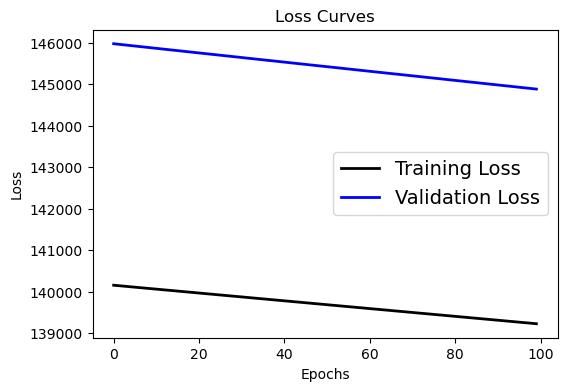

In [52]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)


### Sauvegarder l'historique (Save History and model)

In [53]:
#Saving:

np.save('my_history_sd_1n.npy',history.history)
#np.save('my_history_sd_MLP.npy',history.history)
#np.save('my_history_Ld_1n.npy',history.history)
#np.save('my_history_Ld_MLP.npy',history.history)

In [54]:
#Loading:
history=np.load('my_history.sd_1n.npy',allow_pickle='TRUE').item()


FileNotFoundError: [Errno 2] No such file or directory: 'my_history.sd_1n.npy'

### 6. Faire des prédictions

In [56]:
#Small Sata set
my_data = [ 0.126918, 0.417687, 1.374513, -0.502325 ]
real_price = 350.00
my_data=np.array(my_data).reshape(1,4)


In [58]:
predictions = model.predict( my_data )
print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))


1/1 [==============================] - 0s 36ms/step
Prediction : 1.05 K$
Reality    : 350.00 K$


#### Question :
Au regard des performances  et du résultat de prédiction du modèle, quelle est votre conclusion (avis) sur les performances de ce modèle. 


In [ ]:
# réponse a la question, prediction = 1.05, realitée = 350.00, le modèle est mauvais